In [1]:
from typing_extensions import TypedDict

In [ ]:
class State(TypedDict):
    graph_state: str

In [7]:
def node_estado(state):
    return {'graph_state': state['graph_state'] + "Eu estou"}

def node_fome(state):
    return {"graph_state": state['graph_state'] + " com fome"}

def node_sede(state):
    return {"graph_state": state['graph_state'] + " com sede"}

In [12]:
import random

from typing import Literal

def decide_acao(state) -> Literal["node_fome", "node_sede"]:
    if random.random() < 0.5:
        return "node_fome"
    return "node_sede"

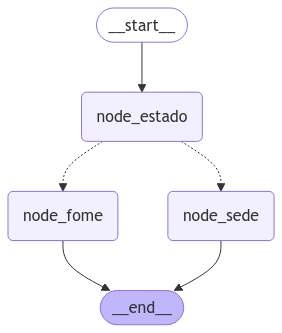

In [13]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)
builder.add_node("node_estado", node_estado)
builder.add_node("node_fome", node_fome)
builder.add_node("node_sede", node_sede)

builder.add_edge(START, "node_estado")
builder.add_conditional_edges("node_estado", decide_acao)
builder.add_edge("node_fome", END)
builder.add_edge("node_sede", END)

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
graph.invoke({"graph_state":"Meu nome é Patrick. "})

{'graph_state': 'Meu nome é Patrick. Eu estou com sede'}